In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def Dh(Zn, Yn, Y2n):
    n = len(Zn) 
    D = np.zeros((n, n))
    D[0, ::2] = Yn
    D[0, 1::2] = Yn
    
    for k in range(1, n): 
        for j in range(n - k):
            if(j%2 == 0 and k == 1):
                D[k,j] = Y2n[j//2]
            else:
                D[k,j] = (D[ k-1, j+ 1] - D[k-1, j]) / (Zn[j + k] - Zn[j])

    return D

def polinomio_hermite(x,nodes, images, images2):
    zi = np.zeros(2*len(nodes))
    zi[::2] = nodes
    zi[1::2] = nodes



    D = Dh(zi,images, images2)
    result = images[0]
    prod = 1
    for k in range(1, len(zi)):
        prod *= (x - zi[k-1])
        result += D[k,0]*prod
    return result


In [51]:
def euler(a, b, alpha, f, N=10):
    h = (b - a) / N
    w0 = alpha
    t = a
    w = [w0]
    t_values = [a]

    for i in range(1, N+1):
        wi = w[i - 1] + h * f(t, w[i - 1])
        t = a + i * h
        w.append(wi)
        t_values.append(t)
    return (t_values, w)

[0.5, 0.8, 1.1520000000000001, 1.5504000000000002, 1.9884800000000002, 2.4581760000000004, 2.9498112000000005, 3.4517734400000006, 3.9501281280000007, 4.428153753600001, 4.865784504320001]


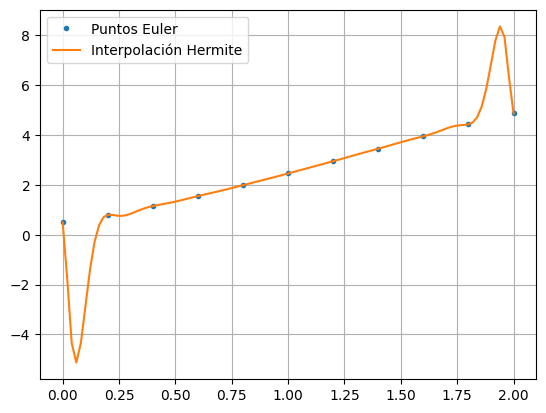

In [54]:
f = lambda t, y: y - (t**2) + 1
(a,b) = [0,2]
alpha = 0.5
N = 10


# Solución del método de Euler
t_values, y_values = euler(a, b, alpha, f, N)

# Calcular derivadas en los nodos
images2 = [f(t, y) for t, y in zip(t_values, y_values)]

# Interpolación con Hermite
interpolation_values = np.linspace(a, b, 100)
interpolation_images = [
    polinomio_hermite(value, t_values, y_values, images2) for value in interpolation_values
]

print(y_values)
# Gráfica
plt.plot(t_values, y_values, '.', label="Puntos Euler")
plt.plot(interpolation_values, interpolation_images, label="Interpolación Hermite")
plt.legend()
plt.grid()
plt.show()
